In [2]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from obspy.io.segy.segy import _read_segy
# from mayavi import mlab    # import mlab
import pyvista as pv

In [3]:
# download file 
# url = 'http://s3.amazonaws.com/open.source.geoscience/open_data/newzealand/Taranaiki_Basin/Keri_3D/Kerry3D.segy'
# urllib.request.urlretrieve(url, filename='Data/Kerry3D.segy')
filename = 'C:/Users/Admin/Downloads/Kerry3D.segy'
raw = _read_segy(filename)

In [4]:
x = np.array(list(raw.textual_file_header.decode()))
print('\n'.join(''.join(row) for row in x.reshape((40, 80))))

C01 AREA        : OFFSHORE TARANAKI - OFFSHORE TARANAKI SEISMIC DATABASE        
C02 DESCRIPTION : KERRY3D SEISMIC COVERAGE - PHASE MATCHED IN GEOFRAME          
C03 =========================================================================== 
C04 DATE     :1996       CLASS      :RAW MIGRATION /+90 DEGREE PHASE SHIFT      
C05 OPERATOR :WMC        PROCESSING :DIGICON SINGAPORE                          
C06 =========================================================================== 
C07 THE 3D DATA HAS BEEN DATUM AND PHASE SHIFTED. DATA HAS BEEN MERGED WITH     
C08 CHECKED NAV AND EXPORTED FROM GEOFRAME 4.2 IN STANDARD SEGY.                
C09 INLINES/SP RANGE :510-796 CDP INC       :1        SAMPLE INTERVAL :4000     
C10 XLINES/CDP RANGE :58-792  SAMPLES/TRACE :1251     FINAL TIME :5000          
C11 LINE INC      :1  TRACES/LINE   :VARIABLE IL/XL X/EAST Y/NORTH              
C12 =========================================================================== 
C13 THIS DATASET WAS PREPARE

In [5]:
data = np.vstack([t.data for t in raw.traces])
data.shape

(210945, 1252)

In [6]:
# np.save("Data/Kerry3D.npy", data)
# data = np.load("Data/Kerry3D.npy")

In [7]:
# number of inlines = MAX Line - MIN Line + 1 = 796 - 510 + 1 = 287
inline_number = 287
# number of crosslines = MAX CDP - MIN CDP + 1 = 792 - 58 + 1 = 735
crossline_number = 735
# reshape data to 3D array
data = data.reshape((287, 735, 1252))

In [8]:
fig = mlab.figure(figure='seismic', bgcolor=(1, 1, 1), fgcolor=(0, 0, 0))
scalars = data

NameError: name 'mlab' is not defined

In [8]:
mlab.volume_slice(scalars, colormap="seismic", slice_index=50, plane_orientation='x_axes', figure=fig)   # crossline slice
mlab.volume_slice(scalars, colormap="seismic", slice_index=50,  plane_orientation='y_axes', figure=fig)   # inline slice
mlab.volume_slice(scalars, colormap="seismic", slice_index=50, plane_orientation='z_axes', figure=fig)   # depth slice
mlab.show()

In [ ]:
vm = np.percentile(data, 99)
print("The 99th percentile is {:.0f}; the max amplitude is {:.0f}".format(vm, data.max()))

In [ ]:
plt.figure(figsize=(18,6))
plt.imshow(data.T, cmap="seismic", vmin=-vm, vmax=vm, aspect='auto')

In [ ]:
raw_2 = _read_segy("Data/Stratton3D_32bit.sgy", headonly=True)
x_2 = np.array(list(raw_2.textual_file_header.decode()))
print('\n'.join(''.join(row) for row in x_2.reshape((40, 80))))

Đang mở cửa sổ hiển thị 3D...


c:\Python\Lib\site-packages\pyvista\jupyter\notebook.py:56: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


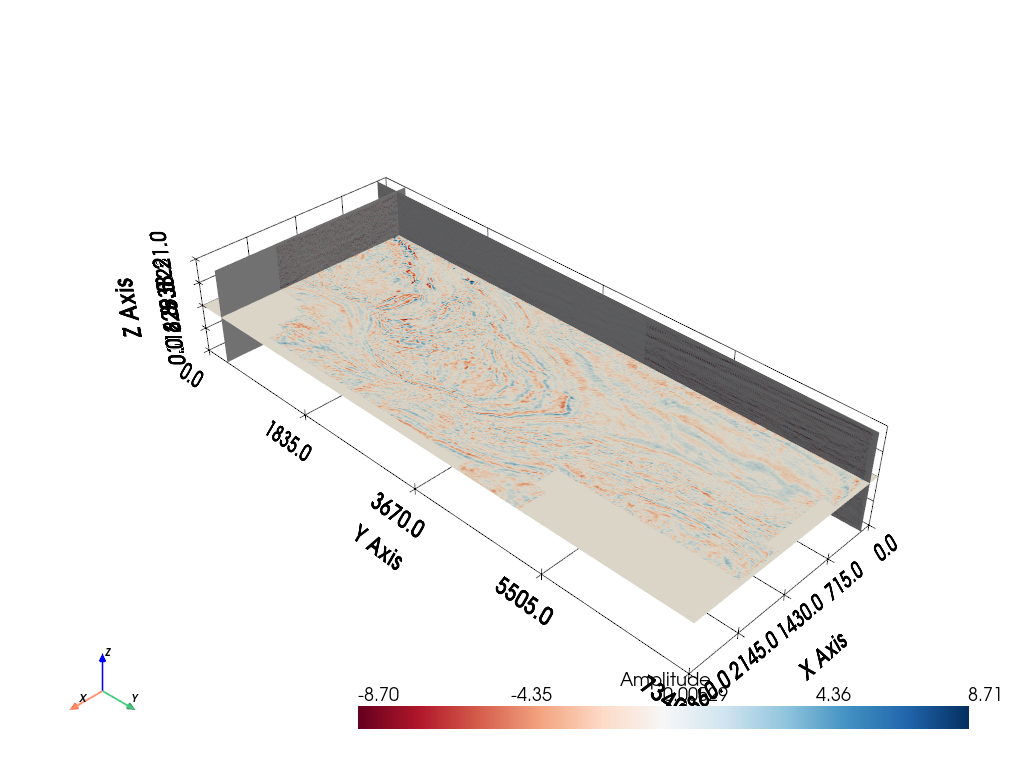

In [9]:
# Tạo lưới ImageData (thay thế cho UniformGrid cũ)
grid = pv.ImageData()

# Thiết lập kích thước lưới
grid.dimensions = np.array(data.shape)

# Thiết lập khoảng cách giữa các điểm (Spacing)
# Bạn có thể điều chỉnh tỉ lệ này để khối địa chấn không bị quá dẹt hoặc quá dài
grid.spacing = (10, 10, 1)  # Giả sử khoảng cách IL, XL là 10m, Time là 1 đơn vị

# Đưa dữ liệu địa chấn vào lưới
grid.point_data["Amplitude"] = data.flatten(order="F")

# Tạo cửa sổ hiển thị
plotter = pv.Plotter(title="SEGY 3D Seismic Visualization (PyVista)")

# CÁCH 1: Hiển thị khối 3D xuyên thấu (Volume Rendering)
# plotter.add_volume(grid, cmap="RdBu", opacity="linear")

# CÁCH 2: Hiển thị các lát cắt (Orthogonal Slices) - Phổ biến nhất trong địa chấn
slices = grid.slice_orthogonal(
    x=grid.dimensions[0]//2, 
    y=grid.dimensions[1]//2, 
    z=grid.dimensions[2]//2
)
plotter.add_mesh(slices, cmap="RdBu", n_colors=256)

# Thêm thanh thước đo và màu sắc
plotter.add_scalar_bar("Amplitude")
plotter.add_axes()
plotter.show_grid()

print("Đang mở cửa sổ hiển thị 3D...")
plotter.show()